In [1]:
from alamopy import almain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/sbugo/surr-vs-imp/surrogate-vs-implicit/svi/Gibbs_reactor/data_gibbs.csv')

## 1. ALAMO Surrogate Model: Reactor Heat Duty

In [2]:
df_heat_duty = df[['T_in (K)', 'P_in (Pa)', 'Conversion','Heat Duty (W)']].copy()
df_heat_duty

,T_in (K),P_in (Pa),Conversion,Heat Duty (W)
0,631.812692,8.202667e+05,0.851694,1.931845e+07
1,536.503975,8.859611e+05,0.889879,2.163057e+07
2,632.248976,1.073849e+06,0.604110,1.395270e+07
3,673.029787,1.134747e+06,0.589302,1.316557e+07
4,669.208746,1.051953e+06,0.832611,1.873776e+07
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,1.322717e+07
495,508.648937,8.757323e+05,0.863533,2.125211e+07
496,505.461885,1.141009e+06,0.740437,1.871702e+07
497,645.546447,9.694365e+05,0.915676,2.114173e+07


In [3]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['Heat Duty (W)']
data_in = df_heat_duty[inputs]
data_out = df_heat_duty[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

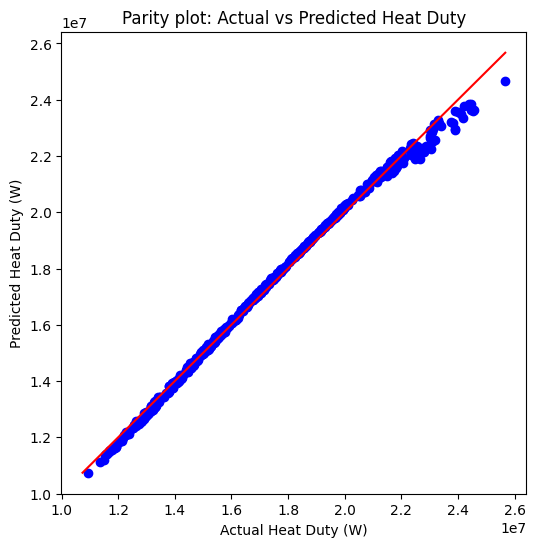

In [4]:
df_heat_duty['Predicted Heat Duty'] = result['out']['Z1']['model_fun'](df_heat_duty['T_in (K)'], df_heat_duty['P_in (Pa)'], df_heat_duty['Conversion'])

min_val = min(df_heat_duty['Heat Duty (W)'].min(), df_heat_duty['Predicted Heat Duty'].min())
max_val = max(df_heat_duty['Heat Duty (W)'].max(), df_heat_duty['Predicted Heat Duty'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_heat_duty['Heat Duty (W)'], df_heat_duty['Predicted Heat Duty'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Heat Duty (W)')
plt.ylabel('Predicted Heat Duty (W)')
plt.title('Parity plot: Actual vs Predicted Heat Duty')
plt.show()	

In [5]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']} W.")
print(f"R2: {result['out']['Z1']['R2']}.")


X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model:  - 12628.9776827291 * X1 + 1.42146122012535 * X2 + 24229809.8707747 * X3 + 5720779.96675229 * 1.0.
RMSE: 229000.0 W.
R2: 0.995.


## 2. ALAMO Surrogate Model: Reactor Outlet Temperature

In [6]:
df_Tout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'T_out (K)']].copy()
df_Tout

,T_in (K),P_in (Pa),Conversion,T_out (K)
0,631.812692,8.202667e+05,0.851694,1044.289680
1,536.503975,8.859611e+05,0.889879,1070.726663
2,632.248976,1.073849e+06,0.604110,970.197524
3,673.029787,1.134747e+06,0.589302,968.877986
4,669.208746,1.051953e+06,0.832611,1055.923406
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,932.848399
495,508.648937,8.757323e+05,0.863533,1055.475777
496,505.461885,1.141009e+06,0.740437,1024.579931
497,645.546447,9.694365e+05,0.915676,1095.286438


In [7]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['T_out (K)']
data_in = df_Tout[inputs]
data_out = df_Tout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

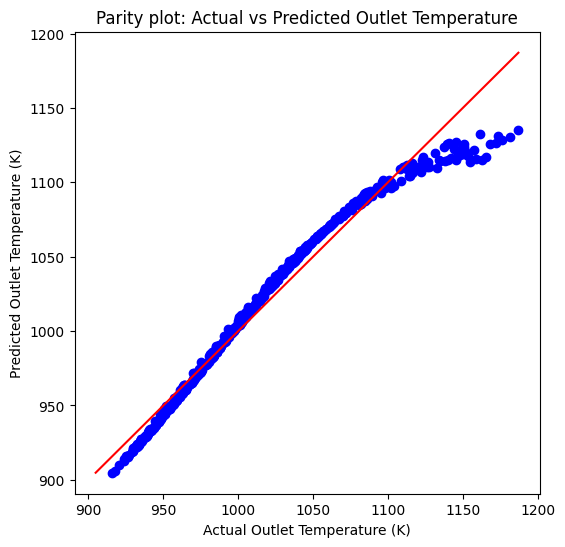

In [8]:
df_Tout['Predicted Outlet Temperature'] = result['out']['Z1']['model_fun'](df_Tout['T_in (K)'], df_Tout['P_in (Pa)'], df_Tout['Conversion'])

min_val = min(df_Tout['T_out (K)'].min(), df_Tout['Predicted Outlet Temperature'].min())
max_val = max(df_Tout['T_out (K)'].max(), df_Tout['Predicted Outlet Temperature'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_Tout['T_out (K)'], df_Tout['Predicted Outlet Temperature'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Outlet Temperature (K)')
plt.ylabel('Predicted Outlet Temperature (K)')
plt.title('Parity plot: Actual vs Predicted Outlet Temperature')
plt.show()	

In [9]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']} K.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model: 7.748123145997609e-05 * X2 + 440.045317380278 * X3 + 618.160553906452 * 1.0.
RMSE: 11.3 K.
R2: 0.967.


## 3. ALAMO Surrogate Model: Reactor Outlet Molar Flow Rate

In [10]:
df_Fout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'F_out (mol/s)']].copy()
df_Fout

,T_in (K),P_in (Pa),Conversion,F_out (mol/s)
0,631.812692,8.202667e+05,0.851694,436.763395
1,536.503975,8.859611e+05,0.889879,442.491108
2,632.248976,1.073849e+06,0.604110,399.625806
3,673.029787,1.134747e+06,0.589302,397.404618
4,669.208746,1.051953e+06,0.832611,433.900935
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,384.341300
495,508.648937,8.757323e+05,0.863533,438.539215
496,505.461885,1.141009e+06,0.740437,420.074782
497,645.546447,9.694365e+05,0.915676,446.360609


In [11]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['F_out (mol/s)']
data_in = df_Fout[inputs]
data_out = df_Fout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

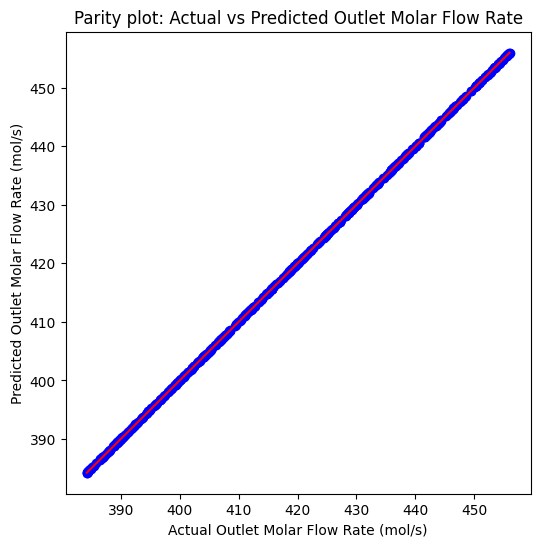

In [12]:
df_Fout['Predicted Outlet Molar Flow Rate'] = result['out']['Z1']['model_fun'](df_Fout['T_in (K)'], df_Fout['P_in (Pa)'], df_Fout['Conversion'])

min_val = min(df_Fout['F_out (mol/s)'].min(), df_Fout['Predicted Outlet Molar Flow Rate'].min())
max_val = max(df_Fout['F_out (mol/s)'].max(), df_Fout['Predicted Outlet Molar Flow Rate'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_Fout['F_out (mol/s)'], df_Fout['Predicted Outlet Molar Flow Rate'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual Outlet Molar Flow Rate (mol/s)')
plt.ylabel('Predicted Outlet Molar Flow Rate (mol/s)')
plt.title('Parity plot: Actual vs Predicted Outlet Molar Flow Rate')
plt.show()	

In [13]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']} mol/s.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model:  - 6.055286933513887e-20 * X2 + 150.0 * X3 + 309.0092696292 * 1.0.
RMSE: 1.4e-13 mol/s.
R2: 1.0.


## 4. ALAMO Surrogate Model: Reactor Outlet H2 Composition

In [14]:
df_H2out = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'H2']].copy()
df_H2out

,T_in (K),P_in (Pa),Conversion,H2
0,631.812692,8.202667e+05,0.851694,0.502814
1,536.503975,8.859611e+05,0.889879,0.513285
2,632.248976,1.073849e+06,0.604110,0.409931
3,673.029787,1.134747e+06,0.589302,0.403084
4,669.208746,1.051953e+06,0.832611,0.494585
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,0.362894
495,508.648937,8.757323e+05,0.863533,0.505759
496,505.461885,1.141009e+06,0.740437,0.462883
497,645.546447,9.694365e+05,0.915676,0.519471


In [15]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['H2']
data_in = df_H2out[inputs]
data_out = df_H2out[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

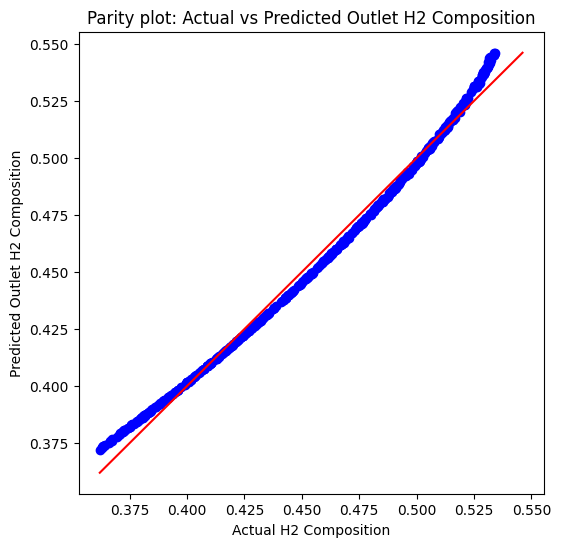

In [16]:
df_H2out['Predicted Outlet H2 Composition'] = result['out']['Z1']['model_fun'](df_H2out['T_in (K)'], df_H2out['P_in (Pa)'], df_H2out['Conversion'])

min_val = min(df_H2out['H2'].min(), df_H2out['Predicted Outlet H2 Composition'].min())
max_val = max(df_H2out['H2'].max(), df_H2out['Predicted Outlet H2 Composition'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_H2out['H2'], df_H2out['Predicted Outlet H2 Composition'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual H2 Composition')
plt.ylabel('Predicted Outlet H2 Composition')
plt.title('Parity plot: Actual vs Predicted Outlet H2 Composition')
plt.show()	

In [17]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']}.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model:  - 7.186549155315197e-09 * X2 + 0.358957041499157 * X3 + 0.200551087010342 * 1.0.
RMSE: 0.00476.
R2: 0.991.


## 5. ALAMO Surrogate Model: Reactor Outlet H2O Composition

In [18]:
df_H2Oout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'H2O']].copy()
df_H2Oout

,T_in (K),P_in (Pa),Conversion,H2O
0,631.812692,8.202667e+05,0.851694,0.325454
1,536.503975,8.859611e+05,0.889879,0.317206
2,632.248976,1.073849e+06,0.604110,0.402378
3,673.029787,1.134747e+06,0.589302,0.408176
4,669.208746,1.051953e+06,0.832611,0.332551
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,0.441951
495,508.648937,8.757323e+05,0.863533,0.323204
496,505.461885,1.141009e+06,0.740437,0.358563
497,645.546447,9.694365e+05,0.915676,0.312490


In [19]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['H2O']
data_in = df_H2Oout[inputs]
data_out = df_H2Oout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

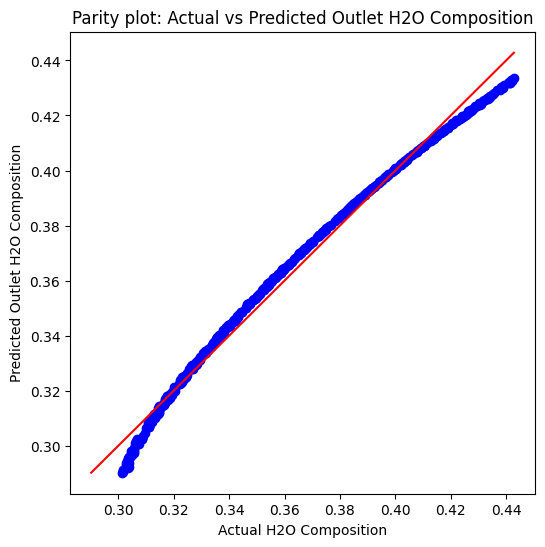

In [20]:
df_H2Oout['Predicted Outlet H2O Composition'] = result['out']['Z1']['model_fun'](df_H2Oout['T_in (K)'], df_H2Oout['P_in (Pa)'], df_H2Oout['Conversion'])

min_val = min(df_H2Oout['H2O'].min(), df_H2Oout['Predicted Outlet H2O Composition'].min())
max_val = max(df_H2Oout['H2O'].max(), df_H2Oout['Predicted Outlet H2O Composition'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_H2Oout['H2O'], df_H2Oout['Predicted Outlet H2O Composition'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual H2O Composition')
plt.ylabel('Predicted Outlet H2O Composition')
plt.title('Parity plot: Actual vs Predicted Outlet H2O Composition')
plt.show()	

In [21]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']}.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model: 7.306697711864181e-09 * X2 - 0.294842225029594 * X3 + 0.57286529956557 * 1.0.
RMSE: 0.00437.
R2: 0.989.


## 6. ALAMO Surrogate Model: Reactor Outlet CO Composition

In [22]:
df_COout = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'CO']].copy()
df_COout

,T_in (K),P_in (Pa),Conversion,CO
0,631.812692,8.202667e+05,0.851694,0.082204
1,536.503975,8.859611e+05,0.889879,0.090049
2,632.248976,1.073849e+06,0.604110,0.043591
3,673.029787,1.134747e+06,0.589302,0.041795
4,669.208746,1.051953e+06,0.832611,0.081099
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,0.029128
495,508.648937,8.757323e+05,0.863533,0.084989
496,505.461885,1.141009e+06,0.740437,0.065921
497,645.546447,9.694365e+05,0.915676,0.095971


In [23]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['CO']
data_in = df_COout[inputs]
data_out = df_COout[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

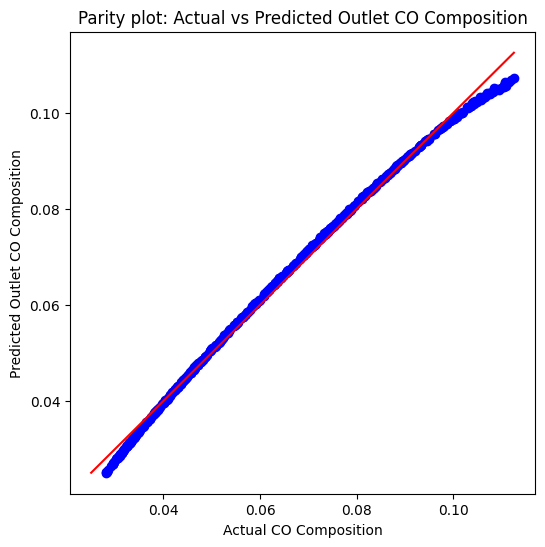

In [24]:
df_COout['Predicted Outlet CO Composition'] = result['out']['Z1']['model_fun'](df_COout['T_in (K)'], df_COout['P_in (Pa)'], df_COout['Conversion'])

min_val = min(df_COout['CO'].min(), df_COout['Predicted Outlet CO Composition'].min())
max_val = max(df_COout['CO'].max(), df_COout['Predicted Outlet CO Composition'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_COout['CO'], df_COout['Predicted Outlet CO Composition'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual CO Composition')
plt.ylabel('Predicted Outlet CO Composition')
plt.title('Parity plot: Actual vs Predicted Outlet CO Composition')
plt.show()

In [25]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']}.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model: 8.17651149133181e-09 * X2 + 0.169316083944801 * X3 - 0.0674835720273249 * 1.0.
RMSE: 0.00152.
R2: 0.996.


## 7. ALAMO Surrogate Model: Reactor Outlet CO2 Composition

In [26]:
df_CO2out = df[['T_in (K)', 'P_in (Pa)', 'Conversion', 'CO2']].copy()
df_CO2out

,T_in (K),P_in (Pa),Conversion,CO2
0,631.812692,8.202667e+05,0.851694,0.064061
1,536.503975,8.859611e+05,0.889879,0.060795
2,632.248976,1.073849e+06,0.604110,0.069801
3,673.029787,1.134747e+06,0.589302,0.069436
4,669.208746,1.051953e+06,0.832611,0.062833
...,...,...,...,...
494,509.828167,1.079670e+06,0.502214,0.068890
495,508.648937,8.757323e+05,0.863533,0.062709
496,505.461885,1.141009e+06,0.740437,0.066291
497,645.546447,9.694365e+05,0.915676,0.057900


In [27]:
inputs = ['T_in (K)', 'P_in (Pa)','Conversion']
outputs = ['CO2']
data_in = df_CO2out[inputs]
data_out = df_CO2out[outputs]
data_in = np.array(data_in)
data_out = np.array(data_out)
result = almain.doalamo(data_in,data_out)

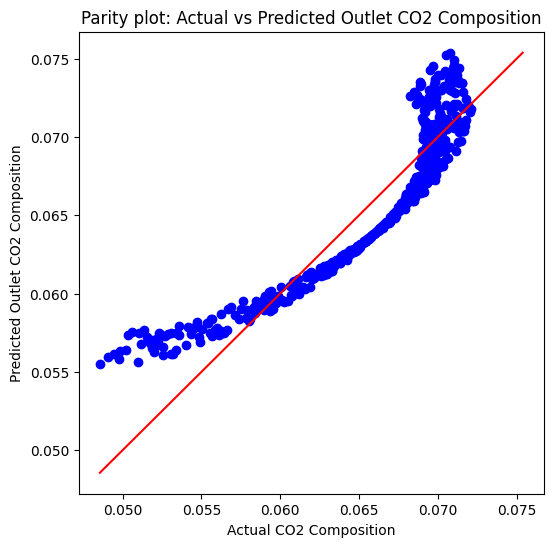

In [28]:
df_CO2out['Predicted Outlet CO2 Composition'] = result['out']['Z1']['model_fun'](df_CO2out['T_in (K)'], df_CO2out['P_in (Pa)'], df_CO2out['Conversion'])

min_val = min(df_CO2out['CO2'].min(), df_CO2out['Predicted Outlet CO2 Composition'].min())
max_val = max(df_CO2out['CO2'].max(), df_CO2out['Predicted Outlet CO2 Composition'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_CO2out['CO2'], df_CO2out['Predicted Outlet CO2 Composition'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual CO2 Composition')
plt.ylabel('Predicted Outlet CO2 Composition')
plt.title('Parity plot: Actual vs Predicted Outlet CO2 Composition')
plt.show()

In [29]:
print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']}.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model:  - 7.929028331599734e-09 * X2 - 0.0372517643945371 * X3 + 0.100764451926625 * 1.0.
RMSE: 0.00232.
R2: 0.832.


In [30]:
# Testing a quadratic surrogate model

result = almain.doalamo(data_in,data_out,monomialpower=[1,2])

print('X1 = T_in (K)')
print('X2 = P_in (Pa)')
print('X3 = Conversion')
print(f"Surrogate model: {result['out']['Z1']['model_str']}.")
print(f"RMSE: {result['out']['Z1']['RMSE']}.")
print(f"R2: {result['out']['Z1']['R2']}.")

X1 = T_in (K)
X2 = P_in (Pa)
X3 = Conversion
Surrogate model:  - 8.602159882852529e-09 * X2 + 0.15654614144981 * X3 - 0.131139677196006 * X3^2 + 0.0323404304008959 * 1.0.
RMSE: 0.000384.
R2: 0.995.


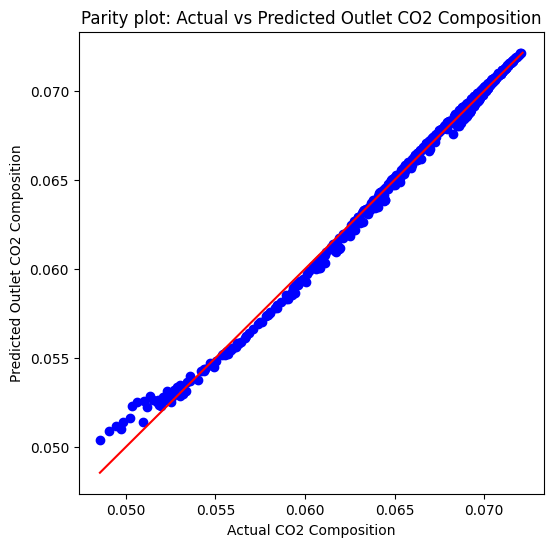

In [31]:
df_CO2out['Predicted Outlet CO2 Composition'] = result['out']['Z1']['model_fun'](df_CO2out['T_in (K)'], df_CO2out['P_in (Pa)'], df_CO2out['Conversion'])

min_val = min(df_CO2out['CO2'].min(), df_CO2out['Predicted Outlet CO2 Composition'].min())
max_val = max(df_CO2out['CO2'].max(), df_CO2out['Predicted Outlet CO2 Composition'].max())
parity = np.linspace(min_val, max_val)

plt.figure(figsize=(6,6))
plt.scatter(df_CO2out['CO2'], df_CO2out['Predicted Outlet CO2 Composition'], color='blue')
plt.plot(parity, parity, color='red')  
plt.xlabel('Actual CO2 Composition')
plt.ylabel('Predicted Outlet CO2 Composition')
plt.title('Parity plot: Actual vs Predicted Outlet CO2 Composition')
plt.show()